# IMPORT LABRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# IMPORT DATASET

In [2]:
df = pd.read_csv('OVERWEIGHT-0-23_FINAL.csv')
df

,AgeGroup,sex_child,bw_grams,psoc_hh,age_hh,feeding,parity_code,educ_mom,wdrinking_code,overweight
0,2,1,1500,7,43,2,1,1,1,0
1,3,2,2268,8,42,4,1,2,0,0
2,1,2,2600,9,53,1,1,1,0,0
3,1,2,3500,6,61,3,1,1,0,1
4,3,2,2900,9,22,4,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
14218,3,2,3000,6,24,2,2,2,0,0
14219,2,2,2600,6,34,1,2,2,0,0
14220,3,1,2750,6,21,3,1,2,1,0
14221,3,1,3305,1,40,2,3,3,0,0


In [3]:
df.sex_child.value_counts()

1    7252
2    6971
Name: sex_child, dtype: int64

# DATA INFORMATION

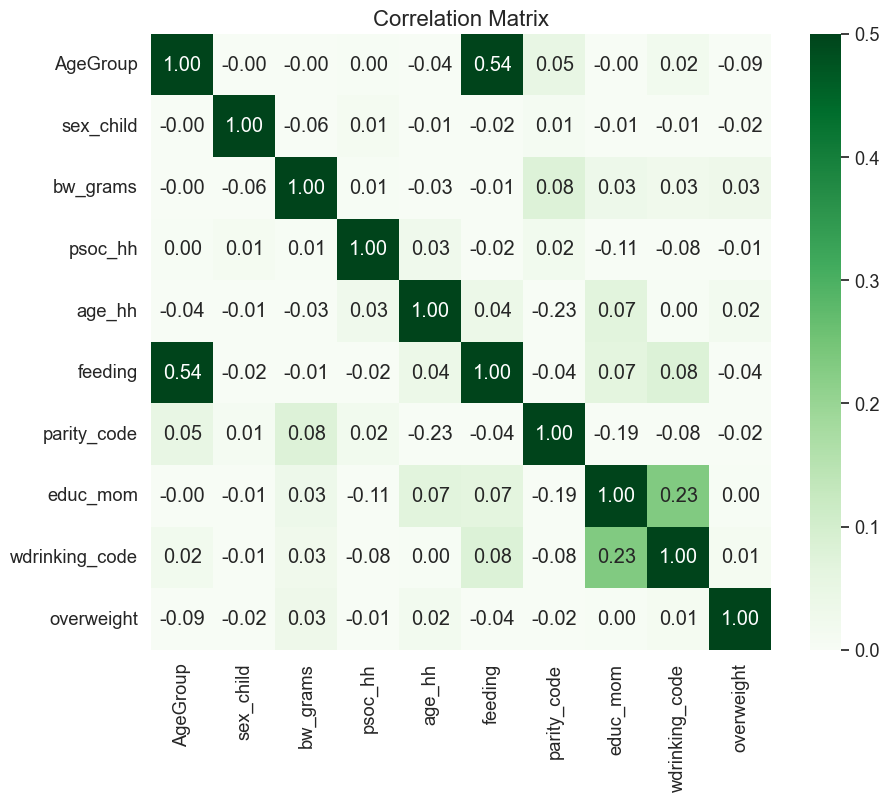

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Greens', 
    fmt=".2f", 
    vmin=0, vmax=0.5,  
)

plt.title("Correlation Matrix", fontsize=16)
plt.show()

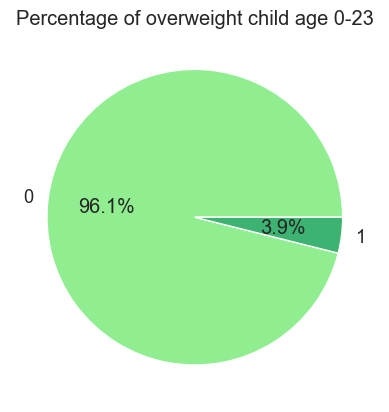

In [5]:
stunting_counts = df['overweight'].value_counts()
stunting_labels = df['overweight'].unique()

colors = ['lightgreen', 'mediumseagreen', 'forestgreen']
plt.pie(stunting_counts, labels=stunting_labels, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of overweight child age 0-23')

plt.show()

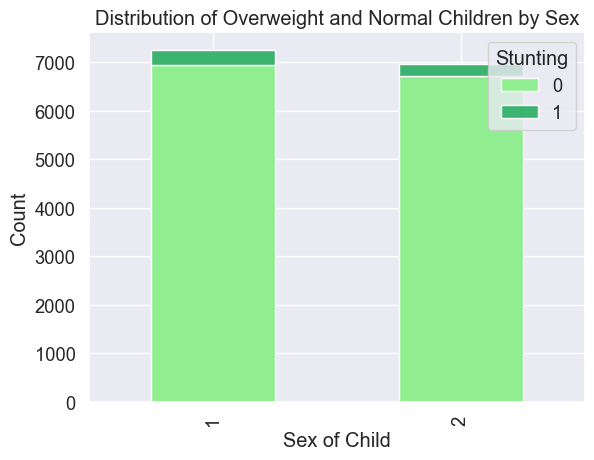

In [6]:
stunting_counts = df.groupby(['sex_child', 'overweight']).size().unstack(fill_value=0)
colors = ['lightgreen', 'mediumseagreen']
stunting_counts.plot(kind='bar', stacked=True, color=colors)

plt.xlabel('Sex of Child')
plt.ylabel('Count')
plt.title('Distribution of Overweight and Normal Children by Sex')

# Show the plot
plt.legend(title='Stunting', loc='upper right')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14223 entries, 0 to 14222
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AgeGroup        14223 non-null  int64
 1   sex_child       14223 non-null  int64
 2   bw_grams        14223 non-null  int64
 3   psoc_hh         14223 non-null  int64
 4   age_hh          14223 non-null  int64
 5   feeding         14223 non-null  int64
 6   parity_code     14223 non-null  int64
 7   educ_mom        14223 non-null  int64
 8   wdrinking_code  14223 non-null  int64
 9   overweight      14223 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB


In [8]:
df['overweight'].value_counts()

0    13667
1      556
Name: overweight, dtype: int64

### STATS CHECK

In [9]:
df.describe()

,AgeGroup,sex_child,bw_grams,psoc_hh,age_hh,feeding,parity_code,educ_mom,wdrinking_code,overweight
count,14223.000000,14223.000000,14223.000000,14223.000000,14223.000000,14223.000000,14223.000000,14223.000000,14223.000000,14223.000000
mean,2.252338,1.490122,2992.539760,6.680236,43.722562,2.222949,2.014202,2.046544,0.349575,0.039092
std,0.820621,0.499920,585.472286,2.308138,12.538752,0.774634,0.752118,0.689699,0.476852,0.193820
min,1.000000,1.000000,800.000000,0.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2700.000000,6.000000,34.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,2.000000,1.000000,3000.000000,6.000000,42.000000,2.000000,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,3300.000000,8.000000,53.000000,3.000000,3.000000,2.000000,1.000000,0.000000
max,3.000000,2.000000,16959.000000,12.000000,91.000000,4.000000,3.000000,4.000000,1.000000,1.000000


# DATA CLEANING

### CHECK DUPS

In [10]:
num_duplicates = df.duplicated().sum()
print("Total dups present in the data: ", num_duplicates)

Total dups present in the data:  224


### NULL HANDLING

In [11]:
df.isnull().sum()

AgeGroup          0
sex_child         0
bw_grams          0
psoc_hh           0
age_hh            0
feeding           0
parity_code       0
educ_mom          0
wdrinking_code    0
overweight        0
dtype: int64

In [12]:
df.columns

Index(['AgeGroup', 'sex_child', 'bw_grams', 'psoc_hh', 'age_hh', 'feeding',
       'parity_code', 'educ_mom', 'wdrinking_code', 'overweight'],
      dtype='object')

In [13]:
df.head()

,AgeGroup,sex_child,bw_grams,psoc_hh,age_hh,feeding,parity_code,educ_mom,wdrinking_code,overweight
0,2,1,1500,7,43,2,1,1,1,0
1,3,2,2268,8,42,4,1,2,0,0
2,1,2,2600,9,53,1,1,1,0,0
3,1,2,3500,6,61,3,1,1,0,1
4,3,2,2900,9,22,4,1,2,0,0


In [14]:
num_duplicates = df.duplicated().sum()
print("Total dups present in the data: ", num_duplicates)

Total dups present in the data:  224


C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


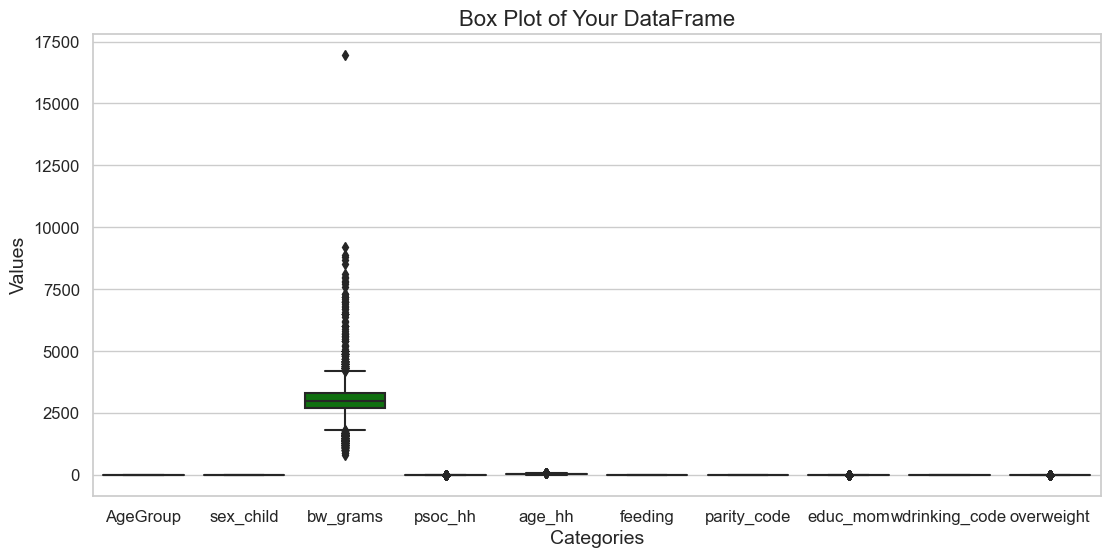

In [15]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid") 
boxplot = sns.boxplot(data=df, color='green')

plt.title('Box Plot of Your DataFrame', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Categories', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

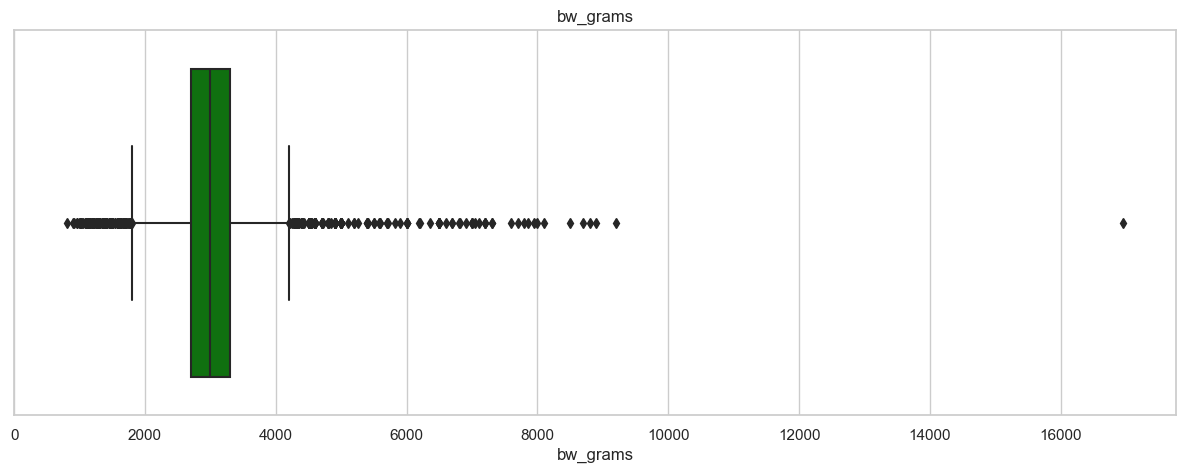

In [16]:
num_cols = ['bw_grams','psoc_hh']

plt.figure(figsize=(15, 5))
for i in range(1) :
    plt.subplot(1,1,i+1)
    
    sns.boxplot(x=df[num_cols[i]],color='green')
    plt.title(num_cols[i])
plt.show()

In [17]:
def detect_outliers(data,column):
    q1 = df[column].quantile(.25)
    q3= df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = df.index[(df[column] <lower_bound) | (df[column] > upper_bound)]
    
    return ls

In [18]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))

In [19]:
before_remove = df.shape

df = df.drop(index_list)
after_remove = df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (14223, 10)
Shape of data after remove : (12340, 10)


In [20]:
df['bw_status'] = df['bw_grams'].apply(lambda x: 1 if x < 2500 else 2)

In [21]:
df.to_csv('OVERWEIGHT-0-23_FINAL_BW_STATUS.csv', index=False)

In [22]:
df

,AgeGroup,sex_child,bw_grams,psoc_hh,age_hh,feeding,parity_code,educ_mom,wdrinking_code,overweight,bw_status
1,3,2,2268,8,42,4,1,2,0,0,1
2,1,2,2600,9,53,1,1,1,0,0,2
3,1,2,3500,6,61,3,1,1,0,1,2
4,3,2,2900,9,22,4,1,2,0,0,2
6,1,1,2100,9,58,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14217,3,1,2300,9,61,3,2,3,0,0,1
14218,3,2,3000,6,24,2,2,2,0,0,2
14219,2,2,2600,6,34,1,2,2,0,0,2
14220,3,1,2750,6,21,3,1,2,1,0,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier

# DATA PREPROCESSING

In [24]:
df.head()

,AgeGroup,sex_child,bw_grams,psoc_hh,age_hh,feeding,parity_code,educ_mom,wdrinking_code,overweight,bw_status
1,3,2,2268,8,42,4,1,2,0,0,1
2,1,2,2600,9,53,1,1,1,0,0,2
3,1,2,3500,6,61,3,1,1,0,1,2
4,3,2,2900,9,22,4,1,2,0,0,2
6,1,1,2100,9,58,1,2,1,0,0,1


In [25]:
df.columns

Index(['AgeGroup', 'sex_child', 'bw_grams', 'psoc_hh', 'age_hh', 'feeding',
       'parity_code', 'educ_mom', 'wdrinking_code', 'overweight', 'bw_status'],
      dtype='object')

In [26]:
df_finals = pd.get_dummies(data = df, columns = ['AgeGroup','sex_child', 'psoc_hh','feeding','parity_code',
       'educ_mom', 'wdrinking_code'])

In [27]:
df

,AgeGroup,sex_child,bw_grams,psoc_hh,age_hh,feeding,parity_code,educ_mom,wdrinking_code,overweight,bw_status
1,3,2,2268,8,42,4,1,2,0,0,1
2,1,2,2600,9,53,1,1,1,0,0,2
3,1,2,3500,6,61,3,1,1,0,1,2
4,3,2,2900,9,22,4,1,2,0,0,2
6,1,1,2100,9,58,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14217,3,1,2300,9,61,3,2,3,0,0,1
14218,3,2,3000,6,24,2,2,2,0,0,2
14219,2,2,2600,6,34,1,2,2,0,0,2
14220,3,1,2750,6,21,3,1,2,1,0,2


In [28]:
df_finals

,bw_grams,age_hh,overweight,bw_status,AgeGroup_1,AgeGroup_2,AgeGroup_3,sex_child_1,sex_child_2,psoc_hh_3,...,parity_code_1,parity_code_2,parity_code_3,educ_mom_0,educ_mom_1,educ_mom_2,educ_mom_3,educ_mom_4,wdrinking_code_0,wdrinking_code_1
1,2268,42,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,2600,53,0,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,3500,61,1,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,2900,22,0,2,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
6,2100,58,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14217,2300,61,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
14218,3000,24,0,2,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
14219,2600,34,0,2,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
14220,2750,21,0,2,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1


In [29]:
df_finals.drop('bw_status', axis=1)

,bw_grams,age_hh,overweight,AgeGroup_1,AgeGroup_2,AgeGroup_3,sex_child_1,sex_child_2,psoc_hh_3,psoc_hh_4,...,parity_code_1,parity_code_2,parity_code_3,educ_mom_0,educ_mom_1,educ_mom_2,educ_mom_3,educ_mom_4,wdrinking_code_0,wdrinking_code_1
1,2268,42,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,2600,53,0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,3500,61,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,2900,22,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
6,2100,58,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14217,2300,61,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
14218,3000,24,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
14219,2600,34,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
14220,2750,21,0,0,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1


#### Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

age_hh_data = df_finals['age_hh'].values.reshape(-1, 1)  # Reshape to a 2D array

scaler = StandardScaler()
standardized_age_hh = scaler.fit_transform(age_hh_data)
df_finals['age_hh'] = standardized_age_hh

bw_grams_data = df_finals['bw_grams'].values.reshape(-1, 1)  # Reshape to a 2D array

scaler = StandardScaler()
standardized_bw_grams = scaler.fit_transform(bw_grams_data)
df_finals['bw_grams'] = standardized_bw_grams
df_finals.head()

,bw_grams,age_hh,overweight,bw_status,AgeGroup_1,AgeGroup_2,AgeGroup_3,sex_child_1,sex_child_2,psoc_hh_3,...,parity_code_1,parity_code_2,parity_code_3,educ_mom_0,educ_mom_1,educ_mom_2,educ_mom_3,educ_mom_4,wdrinking_code_0,wdrinking_code_1
1,-1.571172,-0.074367,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,-0.841527,0.842909,0,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1.136427,1.510020,1,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,-0.182209,-1.742144,0,2,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
6,-1.940390,1.259854,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [31]:
columns_to_convert = df_finals.columns[2:]

df_finals[columns_to_convert] = df_finals[columns_to_convert].astype(int)
df_finals.head()

,bw_grams,age_hh,overweight,bw_status,AgeGroup_1,AgeGroup_2,AgeGroup_3,sex_child_1,sex_child_2,psoc_hh_3,...,parity_code_1,parity_code_2,parity_code_3,educ_mom_0,educ_mom_1,educ_mom_2,educ_mom_3,educ_mom_4,wdrinking_code_0,wdrinking_code_1
1,-1.571172,-0.074367,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,-0.841527,0.842909,0,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1.136427,1.510020,1,2,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,-0.182209,-1.742144,0,2,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
6,-1.940390,1.259854,0,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [32]:
df_finals.overweight.value_counts()

0    11872
1      468
Name: overweight, dtype: int64

In [33]:
x = df_finals.drop('overweight', axis=1)
y = df_finals['overweight']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# LOGISTIC REGRESSION

C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Raw Data - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75      1189
           1       0.07      0.73      0.12        45

    accuracy                           0.62      1234
   macro avg       0.53      0.67      0.44      1234
weighted avg       0.95      0.62      0.73      1234



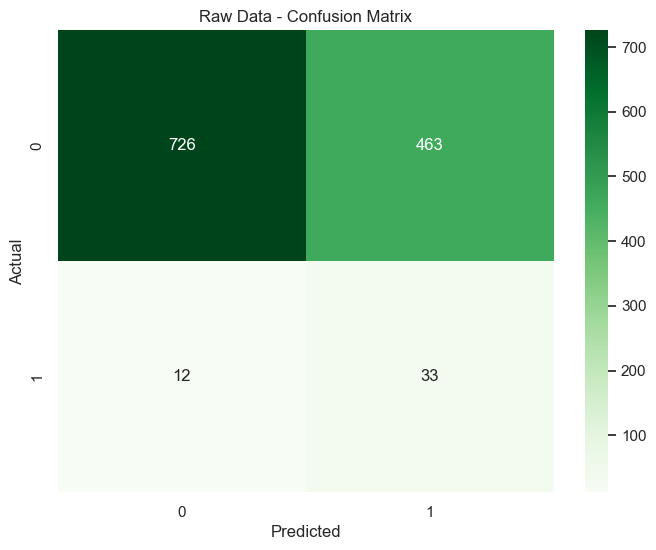

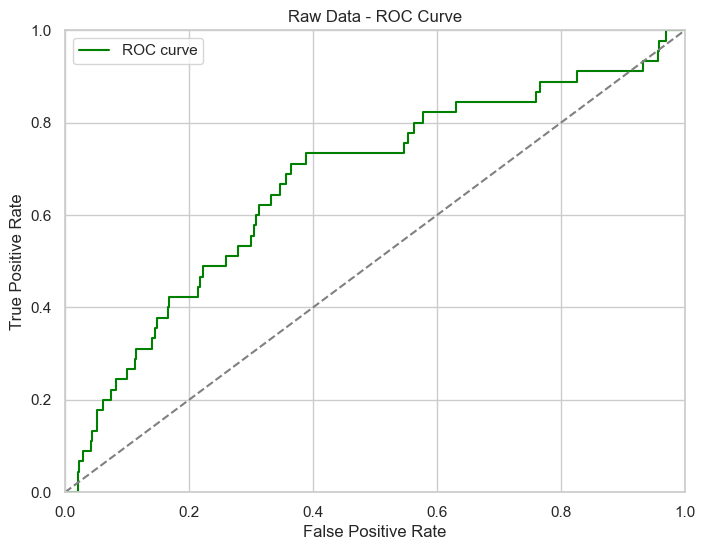

Raw Data - AUC Score: 0.6702


Oversampled Data_standard - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1189
           1       0.12      0.07      0.08        45

    accuracy                           0.95      1234
   macro avg       0.54      0.52      0.53      1234
weighted avg       0.93      0.95      0.94      1234



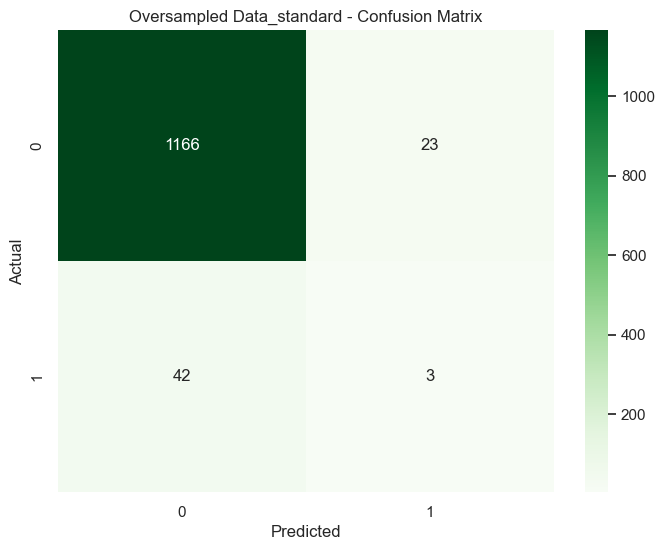

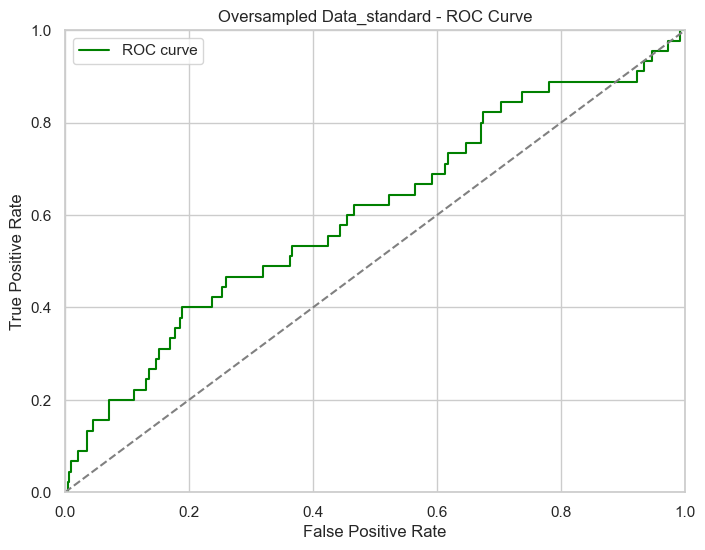

Oversampled Data_standard - AUC Score: 0.6035


Undersampled Data_standard - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.61      0.75      1189
           1       0.06      0.62      0.10        45

    accuracy                           0.61      1234
   macro avg       0.52      0.62      0.43      1234
weighted avg       0.94      0.61      0.73      1234



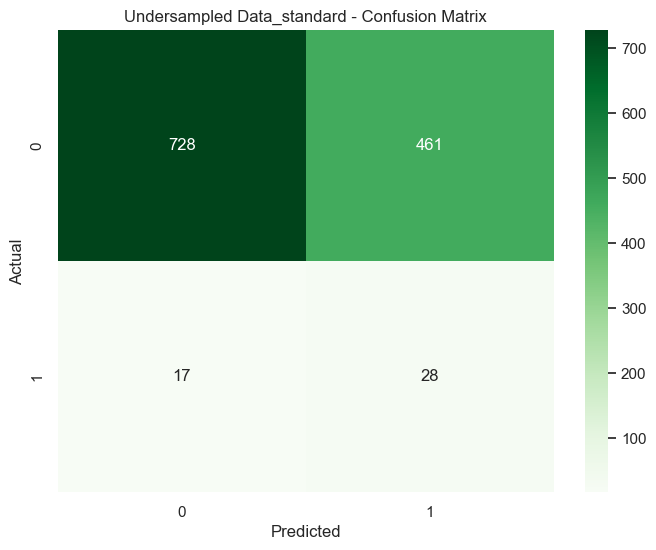

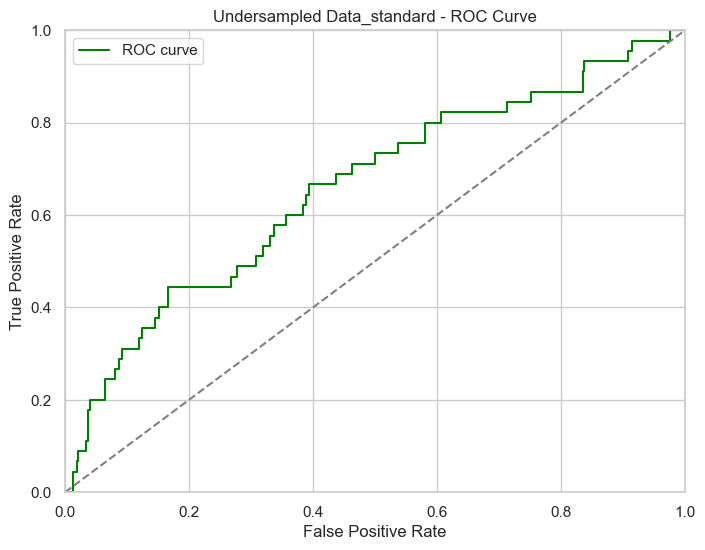

Undersampled Data_standard - AUC Score: 0.6589


SMOTENN Data_standard - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1189
           1       0.11      0.11      0.11        45

    accuracy                           0.94      1234
   macro avg       0.54      0.54      0.54      1234
weighted avg       0.94      0.94      0.94      1234



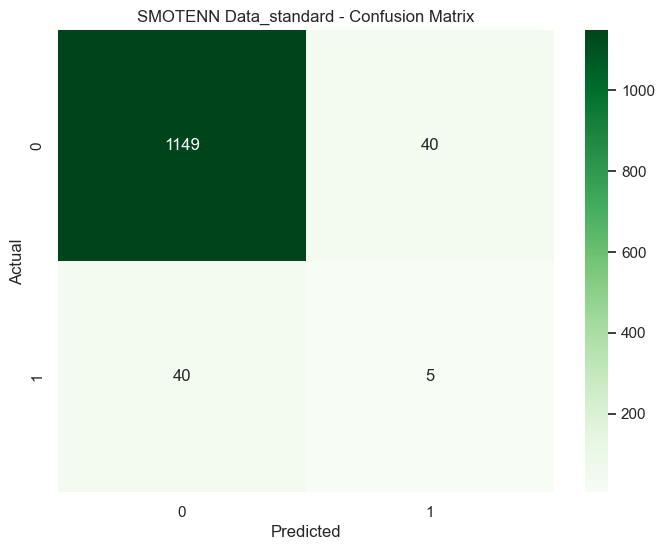

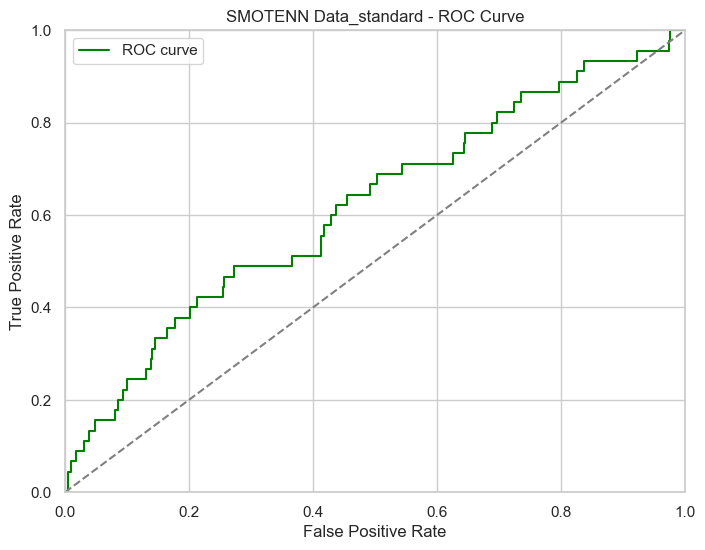

SMOTENN Data_standard - AUC Score: 0.6185




In [35]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import pandas as pd
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Logistic Regression on raw data
lr_model_raw_standard = LogisticRegression(class_weight='balanced', random_state=123)
raw_lr_standard = lr_model_raw_standard.fit(x_train, y_train)
y_pred_raw_lr_standard = raw_lr_standard.predict(x_test)

# Oversampling using SMOTE
smote_lr_standard = SMOTE(random_state=123)
x_train_resampled_smote_lr_standard, y_train_resampled_smote_lr_standard = smote_lr_standard.fit_resample(x_train, y_train)
lr_model_smote_standard = LogisticRegression(class_weight='balanced', random_state=42)
oversampled_lr_standard = lr_model_smote_standard.fit(x_train_resampled_smote_lr_standard, y_train_resampled_smote_lr_standard)
y_pred_oversampled_lr_standard = oversampled_lr_standard.predict(x_test)

# Undersampling using RandomUnderSampler
rus_lr_standard = RandomUnderSampler(random_state=123)
x_train_resampled_rus_lr_standard, y_train_resampled_rus_lr_standard = rus_lr_standard.fit_resample(x_train, y_train)
lr_model_rus_standard = LogisticRegression(class_weight='balanced', random_state=123)
undersampled_lr_standard = lr_model_rus_standard.fit(x_train_resampled_rus_lr_standard, y_train_resampled_rus_lr_standard)
y_pred_undersampled_lr_standard = undersampled_lr_standard.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_lr_standard = SMOTEENN(random_state=123)
x_train_resampled_se_lr_standard, y_train_resampled_se_lr_standard = smoteenn_lr_standard.fit_resample(x_train, y_train)
lr_model_smoteenn_standard = LogisticRegression(class_weight='balanced', random_state=123)
smoteenn_lr_standard = lr_model_smoteenn_standard.fit(x_train_resampled_se_lr_standard, y_train_resampled_se_lr_standard)
y_pred_smoteenn_lr_standard = smoteenn_lr_standard.predict(x_test)

models_lr_standard = [
    ("Raw Data", raw_lr_standard, x_test, y_test),
    ("Oversampled Data_standard", oversampled_lr_standard, x_test, y_test),
    ("Undersampled Data_standard", undersampled_lr_standard, x_test, y_test),
    ("SMOTENN Data_standard", smoteenn_lr_standard, x_test, y_test)
]

for name_lr, model_lr, x_test, y_test in models_lr_standard:
    # Classification Report
    print(f"{name_lr} - Classification Report:")
    print(classification_report(y_test, model_lr.predict(x_test)))

    # Confusion Matrix
    cm_lr = confusion_matrix(y_test, model_lr.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_lr} - Confusion Matrix")
    sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_lr} - ROC Curve")
    y_pred_prob_lr = model_lr.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_prob_lr)
    plt.plot(fpr_lr, tpr_lr, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_lr = roc_auc_score(y_test, y_pred_prob_lr)
    print(f"{name_lr} - AUC Score: {auc_score_lr:.4f}")
    print("\n")


# LOGISTIC REGRESSION HP TUNING

In [36]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid search for raw data
grid_search_raw = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=123), param_grid, cv=5, scoring='roc_auc')
raw_lr = grid_search_raw.fit(x_train, y_train)
y_pred_raw_lr = raw_lr.predict(x_test)

# Oversampling using SMOTE
smote_lr = SMOTE(random_state=123)
x_train_resampled_smote_lr, y_train_resampled_smote_lr = smote_lr.fit_resample(x_train, y_train)
grid_search_smote = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=123), param_grid, cv=5, scoring='roc_auc')
oversampled_lr = grid_search_smote.fit(x_train_resampled_smote_lr, y_train_resampled_smote_lr)
y_pred_oversampled_lr = oversampled_lr.predict(x_test)

# Undersampling using RandomUnderSampler
rus_lr = RandomUnderSampler(random_state=123)
x_train_resampled_rus_lr, y_train_resampled_rus_lr = rus_lr.fit_resample(x_train, y_train)
grid_search_rus = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=123), param_grid, cv=5, scoring='roc_auc')
undersampled_lr = grid_search_rus.fit(x_train_resampled_rus_lr, y_train_resampled_rus_lr)
y_pred_undersampled_lr = undersampled_lr.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_lr = SMOTEENN(random_state=123)
x_train_resampled_se_lr, y_train_resampled_se_lr = smoteenn_lr.fit_resample(x_train, y_train)
grid_search_smoteenn = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=123), param_grid, cv=5, scoring='roc_auc')
smoteenn_lr = grid_search_smoteenn.fit(x_train_resampled_se_lr, y_train_resampled_se_lr)
y_pred_smoteenn_lr = smoteenn_lr.predict(x_test)

print("Best hyperparameters for Raw Data:", raw_lr.best_params_)
print("Best hyperparameters for Oversampled Data:", oversampled_lr.best_params_)
print("Best hyperparameters for Undersampled Data:", undersampled_lr.best_params_)
print("Best hyperparameters for SMOTENN Data:", smoteenn_lr.best_params_)

models_lr = [
    ("Raw Data", raw_lr, x_test, y_test),
    ("Oversampled Data", oversampled_lr, x_test, y_test),
    ("Undersampled Data", undersampled_lr, x_test, y_test),
    ("SMOTENN Data", smoteenn_lr, x_test, y_test)
]

for name_lr, model_lr, x_test, y_test in models_lr:
    # Classification Report
    print(f"{name_lr} - Classification Report:")
    print(classification_report(y_test, model_lr.predict(x_test)))

    # Confusion Matrix
    cm_lr = confusion_matrix(y_test, model_lr.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_lr} - Confusion Matrix")
    sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_lr} - ROC Curve")
    y_pred_prob_lr = model_lr.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_prob_lr)
    plt.plot(fpr_lr, tpr_lr, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_lr = roc_auc_score(y_test, y_pred_prob_lr)
    print(f"{name_lr} - AUC Score: {auc_score_lr:.4f}")
    print("\n")

NameError: name 'GridSearchCV' is not defined

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model on raw data without hyperparameter tuning
raw_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
raw_rf.fit(x_train, y_train)
y_pred_raw_rf = raw_rf.predict(x_test)

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
x_train_resampled_rf, y_train_resampled_rf = smote.fit_resample(x_train, y_train)
oversampled_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
oversampled_rf.fit(x_train_resampled_rf, y_train_resampled_rf)
y_pred_oversampled_rf = oversampled_rf.predict(x_test)

# Undersampling using RandomUnderSampler
rus_rf = RandomUnderSampler(random_state=42)
x_train_resampled_rf, y_train_resampled_rf = rus_rf.fit_resample(x_train, y_train)
undersampled_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
undersampled_rf.fit(x_train_resampled_rf, y_train_resampled_rf)
y_pred_undersampled_rf = undersampled_rf.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_rf = SMOTEENN(random_state=42)
x_train_resampled_rf, y_train_resampled_rf = smoteenn_rf.fit_resample(x_train, y_train)
smoteenn_rf = RandomForestClassifier(class_weight='balanced',random_state=42)
smoteenn_rf.fit(x_train_resampled_rf, y_train_resampled_rf)
y_pred_smoteenn_rf = smoteenn_rf.predict(x_test)

models_rf = [
    ("Raw Data", raw_rf, x_test, y_test),
    ("Oversampled Data", oversampled_rf, x_test, y_test),
    ("Undersampled Data", undersampled_rf, x_test, y_test),
    ("SMOTENN Data", smoteenn_rf, x_test, y_test)
]

for name_rf, model_rf, x_test, y_test in models_rf:
    # Classification Report
    print(f"{name_rf} - Classification Report:")
    print(classification_report(y_test, model_rf.predict(x_test)))

    # Confusion Matrix
    cm_rf = confusion_matrix(y_test, model_rf.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_rf} - Confusion Matrix")
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_rf} - ROC Curve")
    y_pred_prob_rf = model_rf.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_prob_rf)
    plt.plot(fpr_rf, tpr_rf, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
    print(f"{name_rf} - AUC Score: {auc_score_rf:.4f}")
    print("\n")


 # RANDOM FOREST CLASSIFIER HP TUNING

import pickle

with open('rfc_model_94_acc_0-23_overweight.pkl', 'wb') as file:
    pickle.dump(oversampled_rf, file)

# GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model on raw data without hyperparameter tuning
raw_gbc = GradientBoostingClassifier(random_state=123)
raw_gbc.fit(x_train, y_train)
y_pred_raw_gbc = raw_gbc.predict(x_test)

# Oversampling using SMOTE
smote_gbc = SMOTE(random_state=123)
x_train_resampled_gbc, y_train_resampled_gbc = smote_gbc.fit_resample(x_train, y_train)
oversampled_gbc = GradientBoostingClassifier(random_state=123)
oversampled_gbc.fit(x_train_resampled_gbc, y_train_resampled_gbc)
y_pred_oversampled_gbc = oversampled_gbc.predict(x_test)

# Undersampling using RandomUnderSampler
rus_gbc = RandomUnderSampler(random_state=123)
x_train_resampled_gbc, y_train_resampled_gbc = rus_gbc.fit_resample(x_train, y_train)
undersampled_gbc = GradientBoostingClassifier(random_state=123)
undersampled_gbc.fit(x_train_resampled_gbc, y_train_resampled_gbc)
y_pred_undersampled_gbc = undersampled_gbc.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_gbc = SMOTEENN(random_state=123)
x_train_resampled_gbc, y_train_resampled_gbc = smoteenn_gbc.fit_resample(x_train, y_train)
smoteenn_gbc = GradientBoostingClassifier(random_state=123)
smoteenn_gbc.fit(x_train_resampled_gbc, y_train_resampled_gbc)
y_pred_smoteenn_gbc = smoteenn_gbc.predict(x_test)

models_gbc = [
    ("Raw Data", raw_gbc, x_test, y_test),
    ("Oversampled Data", oversampled_gbc, x_test, y_test),
    ("Undersampled Data", undersampled_gbc, x_test, y_test),
    ("SMOTENN Data", smoteenn_gbc, x_test, y_test)
]

for name_gbc, model_gbc, x_test, y_test in models_gbc:
    # Classification Report
    print(f"{name_gbc} - Classification Report:")
    print(classification_report(y_test, model_gbc.predict(x_test)))

    # Confusion Matrix
    cm_gbc = confusion_matrix(y_test, model_gbc.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_gbc} - Confusion Matrix")
    sns.heatmap(cm_gbc, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_gbc} - ROC Curve")
    y_pred_prob_gbc = model_gbc.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_gbc, tpr_gbc, thresholds = roc_curve(y_test, y_pred_prob_gbc)
    plt.plot(fpr_gbc, tpr_gbc, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_gbc = roc_auc_score(y_test, y_pred_prob_gbc)
    print(f"{name_gbc} - AUC Score: {auc_score_gbc:.4f}")
    print("\n")


# GRADIENT BOOSTING CLASSIFIER HP TUNING

# XGB

In [ ]:
from xgboost import XGBClassifier

# XGBoost model on raw data without hyperparameter tuning
raw_xgb = XGBClassifier(random_state=123)
raw_xgb.fit(x_train, y_train)
y_pred_raw_xgb = raw_xgb.predict(x_test)

# Oversampling using SMOTE
smote_xgb = SMOTE(random_state=123)
x_train_resampled_xgb, y_train_resampled_xgb = smote_xgb.fit_resample(x_train, y_train)
oversampled_xgb = XGBClassifier(random_state=123)
oversampled_xgb.fit(x_train_resampled_xgb, y_train_resampled_xgb)
y_pred_oversampled_xgb = oversampled_xgb.predict(x_test)

# Undersampling using RandomUnderSampler
rus_xgb = RandomUnderSampler(random_state=123)
x_train_resampled_xgb, y_train_resampled_xgb = rus_xgb.fit_resample(x_train, y_train)
undersampled_xgb = XGBClassifier(random_state=123)
undersampled_xgb.fit(x_train_resampled_xgb, y_train_resampled_xgb)
y_pred_undersampled_xgb = undersampled_xgb.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_xgb = SMOTEENN(random_state=123)
x_train_resampled_xgb, y_train_resampled_xgb = smoteenn_xgb.fit_resample(x_train, y_train)
smoteenn_xgb = XGBClassifier(random_state=123)
smoteenn_xgb.fit(x_train_resampled_xgb, y_train_resampled_xgb)
y_pred_smoteenn_xgb = smoteenn_xgb.predict(x_test)

models_xgb = [
    ("Raw Data", raw_xgb, x_test, y_test),
    ("Oversampled Data", oversampled_xgb, x_test, y_test),
    ("Undersampled Data", undersampled_xgb, x_test, y_test),
    ("SMOTENN Data", smoteenn_xgb, x_test, y_test)
]

for name_xgb, model_xgb, x_test, y_test in models_xgb:
    # Classification Report
    print(f"{name_xgb} - Classification Report:")
    print(classification_report(y_test, model_xgb.predict(x_test)))

    # Confusion Matrix
    cm_xgb = confusion_matrix(y_test, model_xgb.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_xgb} - Confusion Matrix")
    sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_xgb} - ROC Curve")
    y_pred_prob_xgb = model_xgb.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_prob_xgb)
    plt.plot(fpr_xgb, tpr_xgb, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
    print(f"{name_xgb} - AUC Score: {auc_score_xgb:.4f}")
    print("\n")


# EXTREME GRADIENT BOOSTING CLASSIFIER

# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors model on raw data without hyperparameter tuning
raw_knn = KNeighborsClassifier()
raw_knn.fit(x_train, y_train)
y_pred_raw_knn = raw_knn.predict(x_test)

# Oversampling using SMOTE
smote_knn = SMOTE(random_state=123)
x_train_resampled_knn, y_train_resampled_knn = smote_knn.fit_resample(x_train, y_train)
oversampled_knn = KNeighborsClassifier()
oversampled_knn.fit(x_train_resampled_knn, y_train_resampled_knn)
y_pred_oversampled_knn = oversampled_knn.predict(x_test)

# Undersampling using RandomUnderSampler
rus_knn = RandomUnderSampler(random_state=123)
x_train_resampled_knn, y_train_resampled_knn = rus_knn.fit_resample(x_train, y_train)
undersampled_knn = KNeighborsClassifier()
undersampled_knn.fit(x_train_resampled_knn, y_train_resampled_knn)
y_pred_undersampled_knn = undersampled_knn.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_knn = SMOTEENN(random_state=123)
x_train_resampled_knn, y_train_resampled_knn = smoteenn_knn.fit_resample(x_train, y_train)
smoteenn_knn = KNeighborsClassifier()
smoteenn_knn.fit(x_train_resampled_knn, y_train_resampled_knn)
y_pred_smoteenn_knn = smoteenn_knn.predict(x_test)

models_knn = [
    ("Raw Data", raw_knn, x_test, y_test),
    ("Oversampled Data", oversampled_knn, x_test, y_test),
    ("Undersampled Data", undersampled_knn, x_test, y_test),
    ("SMOTENN Data", smoteenn_knn, x_test, y_test)
]

for name_knn, model_knn, x_test, y_test in models_knn:
    # Classification Report
    print(f"{name_knn} - Classification Report:")
    print(classification_report(y_test, model_knn.predict(x_test)))

    # Confusion Matrix
    cm_knn = confusion_matrix(y_test, model_knn.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_knn} - Confusion Matrix")
    sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_knn} - ROC Curve")
    y_pred_prob_knn = model_knn.predict_proba(x_test)[:, 1]  # Probability of the positive class
    fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_prob_knn)
    plt.plot(fpr_knn, tpr_knn, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)
    print(f"{name_knn} - AUC Score: {auc_score_knn:.4f}")
    print("\n")


# K-Nearest Neighbor hp tuning

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model on raw data
raw_nb = GaussianNB()
raw_nb.fit(x_train, y_train)
y_pred_raw_nb = raw_nb.predict(x_test)

# Oversampling using SMOTE
smote_nb = SMOTE(random_state=123)
x_train_resampled_nb, y_train_resampled_nb = smote_nb.fit_resample(x_train, y_train)
oversampled_nb = GaussianNB()
oversampled_nb.fit(x_train_resampled_nb, y_train_resampled_nb)
y_pred_oversampled_nb = oversampled_nb.predict(x_test)

# Undersampling using RandomUnderSa_nbmpler
rus_nb = RandomUnderSampler(random_state=123)
x_train_resampled_nb, y_train_resampled_nb = rus_nb.fit_resample(x_train, y_train)
undersampled_nb = GaussianNB()
undersampled_nb.fit(x_train_resampled_nb, y_train_resampled_nb)
y_pred_undersampled_nb = undersampled_nb.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_nb = SMOTEENN(random_state=123)
x_train_resampled_nb, y_train_resampled_nb = smoteenn_nb.fit_resample(x_train, y_train)
smoteenn_nb = GaussianNB()
smoteenn_nb.fit(x_train_resampled_nb, y_train_resampled_nb)
y_pred_smoteenn_nb = smoteenn_nb.predict(x_test)

models_nb = [
    ("Raw Data", raw_nb , x_test, y_test),
    ("Oversampled Data", oversampled_nb , x_test, y_test),
    ("Undersampled Data", undersampled_nb , x_test, y_test),
    ("SMOTENN Data", smoteenn_nb , x_test, y_test)
]

for name_nb, model_nb, x_test, y_test in models_nb:
    # Classification Report
    print(f"{name_nb} - Classification Report:")
    print(classification_report(y_test, model_nb.predict(x_test)))

    # Confusion Matrix
    cm_nb = confusion_matrix(y_test, model_nb.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_nb} - Confusion Matrix")
    sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_nb} - ROC Curve")
    y_pred_prob_nb = model_nb.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_pred_prob_nb)
    plt.plot(fpr_nb, tpr_nb, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_nb = roc_auc_score(y_test, y_pred_prob_nb)
    print(f"{name_nb} - AUC Score: {auc_score_nb:.4f}")
    print("\n")


# SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn.svm import SVC

# SVM model on raw data
raw_svc = SVC(random_state=123)
raw_svc.fit(x_train, y_train)
y_pred_raw_svc = raw_svc.predict(x_test)

# Oversampling using SMOTE
smote_svc = SMOTE(random_state=123)
x_train_resampled_svc, y_train_resampled_svc = smote_svc.fit_resample(x_train, y_train)
oversampled_svc = SVC(random_state=123)
oversampled_svc.fit(x_train_resampled_svc, y_train_resampled_svc)
y_pred_oversampled_svc = oversampled_svc.predict(x_test)

# Undersampling using RandomUnderSampler
rus_svc = RandomUnderSampler(random_state=123)
x_train_resampled_svc, y_train_resampled_svc = rus_svc.fit_resample(x_train, y_train)
undersampled_svc = SVC(random_state=123)
undersampled_svc.fit(x_train_resampled_svc, y_train_resampled_svc)
y_pred_undersampled_svc = undersampled_svc.predict(x_test)

# Combining Oversampling and Undersampling using SMOTEENN
smoteenn_svc = SMOTEENN(random_state=123)
x_train_resampled_svc, y_train_resampled_svc = smoteenn_svc.fit_resample(x_train, y_train)
smoteenn_svc = SVC(random_state=123)
smoteenn_svc.fit(x_train_resampled_svc, y_train_resampled_svc)
y_pred_smoteenn_svc = smoteenn_svc.predict(x_test)


models_svc = [
    ("Raw Data", raw_svc , x_test, y_test),
    ("Oversampled Data", oversampled_svc , x_test, y_test),
    ("Undersampled Data", undersampled_svc , x_test, y_test),
    ("SMOTENN Data", smoteenn_svc , x_test, y_test)
]

for name_svc, model_svc, x_test, y_test in models_svc:
    # Classification Report
    print(f"{name_svc} - Classification Report:")
    print(classification_report(y_test, model_svc.predict(x_test)))

    # Confusion Matrix
    cm_svc = confusion_matrix(y_test, model_svc.predict(x_test))
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_svc} - Confusion Matrix")
    sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    plt.figure(figsize=(8, 6))
    plt.title(f"{name_svc} - ROC Curve")
    y_pred_prob_svc = model_nb.predict_proba(x_test)[:, 1]  # Probability of positive class
    fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_pred_prob_svc)
    plt.plot(fpr_svc, tpr_svc, color="green", label="ROC curve")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend()
    plt.show()

    # AUC Score
    auc_score_svc = roc_auc_score(y_test, y_pred_prob_svc)
    print(f"{name_svc} - AUC Score: {auc_score_svc:.4f}")
    print("\n")


# CROSS VALIDATION

### RAW

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Hyperparameter tuning for Logistic Regression
lr_classifier_raw_cv = LogisticRegression(random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_lr_raw_cv = GridSearchCV(estimator=lr_classifier_raw_cv, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_raw_cv.fit(x_train, y_train)
best_lr_classifier_raw_cv = grid_search_lr_raw_cv.best_estimator_

# Hyperparameter tuning for Random Forest
rf_classifier_raw_cv = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf_raw_cv = GridSearchCV(estimator=rf_classifier_raw_cv, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf_raw_cv.fit(x_train, y_train)
best_rf_classifier_raw_cv = grid_search_rf_raw_cv.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_classifier_raw_cv = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb_raw_cv = GridSearchCV(estimator=gb_classifier_raw_cv, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb_raw_cv.fit(x_train, y_train)
best_gb_classifier_raw_cv = grid_search_gb_raw_cv.best_estimator_

# Create an ensemble of models using VotingClassifier
svm_classifier_raw_cv = SVC(probability=True, random_state=42)
nn_classifier_raw_cv = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

ensemble_model_raw_cv = VotingClassifier(estimators=[
    ('rf', best_rf_classifier_raw_cv),
    ('gb', best_gb_classifier_raw_cv),
    ('svm', svm_classifier_raw_cv),
    ('lr', best_lr_classifier_raw_cv),
    ('nn', nn_classifier_raw_cv)
], voting='soft')

# Evaluate the ensemble model using cross-validation
cross_val_scores_raw_cv = cross_val_score(ensemble_model_raw_cv, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores_raw_cv)
print("Mean CV Accuracy:", cross_val_scores_raw_cv.mean())

# Fit the ensemble model
ensemble_model_raw_cv.fit(x_train, y_train)

# Make predictions
y_pred_cv_raw_cv = ensemble_model_raw_cv.predict(x_test)

# Calculate accuracy and classification report
accuracy_raw_cv = accuracy_score(y_test, y_pred_cv_raw_cv)
classification_rep_raw_cv = classification_report(y_test, y_pred_cv_raw_cv)

print(f'Accuracy: {accuracy_raw_cv:.2f}')
print('Classification Report:')
print(classification_rep_raw_cv)

# Calculate confusion matrix and mean squared error
conf_matrix_raw_cv = confusion_matrix(y_test, y_pred_cv_raw_cv)
# Set up the figure and axis with Seaborn styling
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_raw_cv, annot=True, fmt="d", cmap='Greens')  # Using a green color palette
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate ROC curve and AUC
y_prob_cv_raw_cv = ensemble_model_raw_cv.predict_proba(x_test)[:, 1]
fpr_raw_cv, tpr_raw_cv, thresholds_raw_cv = roc_curve(y_test, y_prob_cv_raw_cv)
roc_auc_raw_cv = auc(fpr_raw_cv, tpr_raw_cv)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw_cv, tpr_raw_cv, color='green', lw=2, label='AUC = %0.2f' % roc_auc_raw_cv)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Visualize cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cross_val_scores_raw_cv, color='green')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, 6))
plt.ylim([0, 1])
plt.show()


### SMOTE

In [ ]:
# Apply SMOTE for handling imbalanced data
smote = SMOTE(random_state=42)
x_train_resampled_smote_cv, y_train_resampled_smote_cv = smote.fit_resample(x_train, y_train)

# Hyperparameter tuning for Logistic Regression
lr_classifier_smote_cv = LogisticRegression(random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_lr_smote_cv = GridSearchCV(estimator=lr_classifier_smote_cv, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_smote_cv.fit(x_train_resampled_smote_cv, y_train_resampled_smote_cv)
best_lr_classifier_smote_cv = grid_search_lr_smote_cv.best_estimator_

# Hyperparameter tuning for Random Forest
rf_classifier_smote_cv = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf_smote_cv = GridSearchCV(estimator=rf_classifier_smote_cv, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf_smote_cv.fit(x_train_resampled_smote_cv, y_train_resampled_smote_cv)
best_rf_classifier_smote_cv = grid_search_rf_smote_cv.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_classifier_smote_cv = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb_smote_cv = GridSearchCV(estimator=gb_classifier_smote_cv, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb_smote_cv.fit(x_train_resampled_smote_cv, y_train_resampled_smote_cv)
best_gb_classifier_smote_cv = grid_search_gb_smote_cv.best_estimator_

# Create an ensemble of models using VotingClassifier
svm_classifier_smote_cv = SVC(probability=True, random_state=42)
nn_classifier_smote_cv = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

ensemble_model_smote_cv = VotingClassifier(estimators=[
    ('rf', best_rf_classifier_smote_cv),
    ('gb', best_gb_classifier_smote_cv),
    ('svm', svm_classifier_smote_cv),
    ('lr', best_lr_classifier_smote_cv),
    ('nn', nn_classifier_smote_cv)
], voting='soft')

# Evaluate the ensemble model using cross-validation
cross_val_scores_smote_cv = cross_val_score(ensemble_model_smote_cv, x_train_resampled_smote_cv, y_train_resampled_smote_cv, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores_smote_cv)
print("Mean CV Accuracy:", cross_val_scores_smote_cv.mean())

# Fit the ensemble model
ensemble_model_smote_cv.fit(x_train_resampled_smote_cv, y_train_resampled_smote_cv)

# Make predictions
y_pred_cv_smote_cv = ensemble_model_smote_cv.predict(x_test)

# Calculate accuracy and classification report
accuracy_smote_cv = accuracy_score(y_test, y_pred_cv_smote_cv)
classification_rep_smote_cv = classification_report(y_test, y_pred_cv_smote_cv)

print(f'Accuracy: {accuracy_smote_cv:.2f}')
print('Classification Report:')
print(classification_rep_smote_cv)

# Calculate confusion matrix and mean squared error
conf_matrix_smote_cv = confusion_matrix(y_test, y_pred_cv_smote_cv)
# Set up the figure and axis with Seaborn styling
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_smote_cv, annot=True, fmt="d", cmap='Greens')  # Using a green color palette
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate ROC curve and AUC
y_prob_cv_smote_cv = ensemble_model_smote_cv.predict_proba(x_test)[:, 1]
fpr_smote_cv, tpr_smote_cv, thresholds_smote_cv = roc_curve(y_test, y_prob_cv_smote_cv)
roc_auc_smote_cv = auc(fpr_smote_cv, tpr_smote_cv)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote_cv, tpr_smote_cv, color='green', lw=2, label='AUC = %0.2f' % roc_auc_smote_cv)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Visualize cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cross_val_scores_smote_cv, color='green')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, 6))
plt.ylim([0, 1])
plt.show()


### UNDERSAMPLING

In [ ]:
# Apply RandomUnderSampler for handling imbalanced data
rus = RandomUnderSampler(random_state=42)
x_train_resampled_cv_rus, y_train_resampled_cv_rus = rus.fit_resample(x_train, y_train)

# Hyperparameter tuning for Logistic Regression
lr_classifier_cv_rus = LogisticRegression(random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_lr_cv_rus = GridSearchCV(estimator=lr_classifier_cv_rus, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr_cv_rus.fit(x_train_resampled_cv_rus, y_train_resampled_cv_rus)
best_lr_classifier_cv_rus = grid_search_lr_cv_rus.best_estimator_

# Hyperparameter tuning for Random Forest
rf_classifier_cv_rus = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf_cv_rus = GridSearchCV(estimator=rf_classifier_cv_rus, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf_cv_rus.fit(x_train_resampled_cv_rus, y_train_resampled_cv_rus)
best_rf_classifier_cv_rus = grid_search_rf_cv_rus.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_classifier_cv_rus = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb_cv_rus = GridSearchCV(estimator=gb_classifier_cv_rus, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb_cv_rus.fit(x_train_resampled_cv_rus, y_train_resampled_cv_rus)
best_gb_classifier_cv_rus = grid_search_gb_cv_rus.best_estimator_

# Create an ensemble of models using VotingClassifier
svm_classifier_cv_rus = SVC(probability=True, random_state=42)
nn_classifier_cv_rus = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

ensemble_model_cv_rus = VotingClassifier(estimators=[
    ('rf', best_rf_classifier_cv_rus),
    ('gb', best_gb_classifier_cv_rus),
    ('svm', svm_classifier_cv_rus),
    ('lr', best_lr_classifier_cv_rus),
    ('nn', nn_classifier_cv_rus)
], voting='soft')

# Evaluate the ensemble model using cross-validation
cross_val_scores_cv_rus = cross_val_score(ensemble_model_cv_rus, x_train_resampled_cv_rus, y_train_resampled_cv_rus, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores_cv_rus)
print("Mean CV Accuracy:", cross_val_scores_cv_rus.mean())

# Fit the ensemble model
ensemble_model_cv_rus.fit(x_train_resampled_cv_rus, y_train_resampled_cv_rus)

# Make predictions
y_pred_cv_rus = ensemble_model_cv_rus.predict(x_test)

# Calculate accuracy and classification report
accuracy_cv_rus = accuracy_score(y_test, y_pred_cv_rus)
classification_rep_cv_rus = classification_report(y_test, y_pred_cv_rus)

print(f'Accuracy: {accuracy_cv_rus:.2f}')
print('Classification Report:')
print(classification_rep_cv_rus)

# Calculate confusion matrix and mean squared error
conf_matrix_cv_rus = confusion_matrix(y_test, y_pred_cv_rus)
# Set up the figure and axis with Seaborn styling
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_cv_rus, annot=True, fmt="d", cmap='Greens')  # Using a green color palette
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate ROC curve and AUC
y_prob_cv_rus = ensemble_model_cv_rus.predict_proba(x_test)[:, 1]
fpr_cv_rus, tpr_cv_rus, thresholds_cv_rus = roc_curve(y_test, y_prob_cv_rus)
roc_auc_cv_rus = auc(fpr_cv_rus, tpr_cv_rus)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv_rus, tpr_cv_rus, color='green', lw=2, label='AUC = %0.2f' % roc_auc_cv_rus)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Visualize cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cross_val_scores_cv_rus, color='green')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, 6))
plt.ylim([0, 1])
plt.show()


### SMOTEENN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Apply SMOTE for handling imbalanced data
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(x_train, y_train)

lr_classifier = LogisticRegression(random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_resampled, y_train_resampled)
best_lr_classifier = grid_search_lr.best_estimator_

# Hyperparameter tuning for Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_classifier = grid_search_rf.best_estimator_

# Hyperparameter tuning for Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_resampled, y_train_resampled)
best_gb_classifier = grid_search_gb.best_estimator_

# Create an ensemble of models using VotingClassifier
svm_classifier = SVC(probability=True, random_state=42)
nn_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf_classifier),
    ('gb', best_gb_classifier),
    ('svm', svm_classifier),
    ('lr', best_lr_classifier),
    ('nn', nn_classifier)
], voting='soft')

# Evaluate the ensemble model using cross-validation
cross_val_scores = cross_val_score(ensemble_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

# Fit the ensemble model
ensemble_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_cv = ensemble_model.predict(x_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_cv)
classification_rep = classification_report(y_test, y_pred_cv)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_rep)

# Calculate confusion matrix and mean squared error
conf_matrix = confusion_matrix(y_test, y_pred_cv)
# Set up the figure and axis with Seaborn styling
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Greens')  # Using a green color palette
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate ROC curve and AUC
y_prob_cv = ensemble_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Visualize cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cross_val_scores, color='green')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.xticks(range(1, 6))
plt.ylim([0, 1])
plt.show()

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_prob_lr, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob_rf, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_prob_gbc, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_prob_xgb, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_pred_prob_knn, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_pred_prob_nb, pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, y_pred_prob_svc, pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, y_pred_prob_lr, multi_class='ovr' )
auc_score2 = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr' )
auc_score3 = roc_auc_score(y_test, y_pred_prob_gbc, multi_class='ovr' )
auc_score4 = roc_auc_score(y_test, y_pred_prob_xgb, multi_class='ovr' )
auc_score5 = roc_auc_score(y_test, y_pred_prob_knn, multi_class='ovr' )
auc_score6 = roc_auc_score(y_test, y_pred_prob_nb, multi_class='ovr' )
auc_score7 = roc_auc_score(y_test, y_pred_prob_svc, multi_class='ovr' )

print(auc_score1,auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(fpr1, tpr1, linestyle='-', color='orange', label= "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle='-', color='green', label= "Random Forest Classifier")
plt.plot(fpr3, tpr3, linestyle='-', color='red', label= "Gradient Boosting Classifier")
plt.plot(fpr4, tpr4, linestyle='-', color='purple', label= "Extreme Gradient Boosting Classifier")
plt.plot(fpr5, tpr5, linestyle='-', color='cyan', label= "K-Nearest Neigbor")
plt.plot(fpr6, tpr6, linestyle='-', color='yellow', label= "Naive Bayes")
plt.plot(fpr1, tpr1, linestyle='-', color='blue', label= "Support Vector Machine")

plt.title('ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show();

In [ ]:
accuracy_lr_smoteenn = accuracy_score(y_test, y_pred_smoteenn_lr)
ccuracy_rf_smoteenn = accuracy_score(y_test, y_pred_smoteenn_rf)
ccuracy_gbc_smoteenn = accuracy_score(y_test, y_pred_smoteenn_gbc)
ccuracy_xgb_smoteenn = accuracy_score(y_test, y_pred_smoteenn_xgb)
ccuracy_knn_smoteenn = accuracy_score(y_test, y_pred_smoteenn_knn)
ccuracy_nb_smoteenn = accuracy_score(y_test, y_pred_smoteenn_nb)
ccuracy_svc_smoteenn = accuracy_score(y_test, y_pred_smoteenn_svc)

prediction_acc_smoteenn = {
    "Model": ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Extreme Gradient Boosting Classifier',
             'K-Nearest Neigbor', 'Naive Bayes', 'Support Vector Machine'],
    "Accuracy": [accuracy_lr_smoteenn, ccuracy_rf_smoteenn, ccuracy_gbc_smoteenn, ccuracy_xgb_smoteenn,ccuracy_knn_smoteenn,
                ccuracy_nb_smoteenn, ccuracy_svc_smoteenn]    
}

model_acc_smoteenn = pd.DataFrame(prediction_acc_smoteenn, columns=["Model", "Accuracy"])
top_3_models = model_acc_smoteenn.nlargest(3, "Accuracy")
lowest_model = model_acc_smoteenn.nsmallest(1, "Accuracy")
top_3_models_label = ['TOP 1', 'TOP 2', 'TOP 3']
lowest_model_label = ['LOWEST']
top_3_models["Label"] = top_3_models_label
lowest_model["Label"] = lowest_model_label
table_data = pd.concat([top_3_models, lowest_model])

styled_table = table_data.style.highlight_max(subset="Accuracy", color="green").highlight_min(subset="Accuracy", color='red')

display(styled_table)

graph_data = pd.concat([top_3_models, lowest_model])
graph_data = graph_data.sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(16,8))
ax = sns.barplot(x="Model", y="Accuracy", data=graph_data, palette="Greens")
ax.bar_label(ax.containers[0])
plt.title('Performance analysis of different classifiers', fontsize=20)
plt.show()